In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dagstermill

In [12]:
context = dagstermill.get_context(op_config=3)

In [13]:
# this cell has been tagged with "parameters"

# Having the iris fetching code in the parameters cell allows dagster to overwrite this cell and replace
# it with the contents of the upstream iris_dataset asset. If you want to run the notebook locally, this
# cell will remain, which allows you to fetch the dataset directly.


def iris_dataset() -> pd.DataFrame:
    return pd.read_csv(
        "https://docs.dagster.io/assets/iris.csv",
        names=[
            "sepal_length_cm",
            "sepal_width_cm",
            "petal_length_cm",
            "petal_width_cm",
            "species",
        ],
    )

iris =  iris_dataset()

In [14]:
# Descriptive analysis

In [15]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


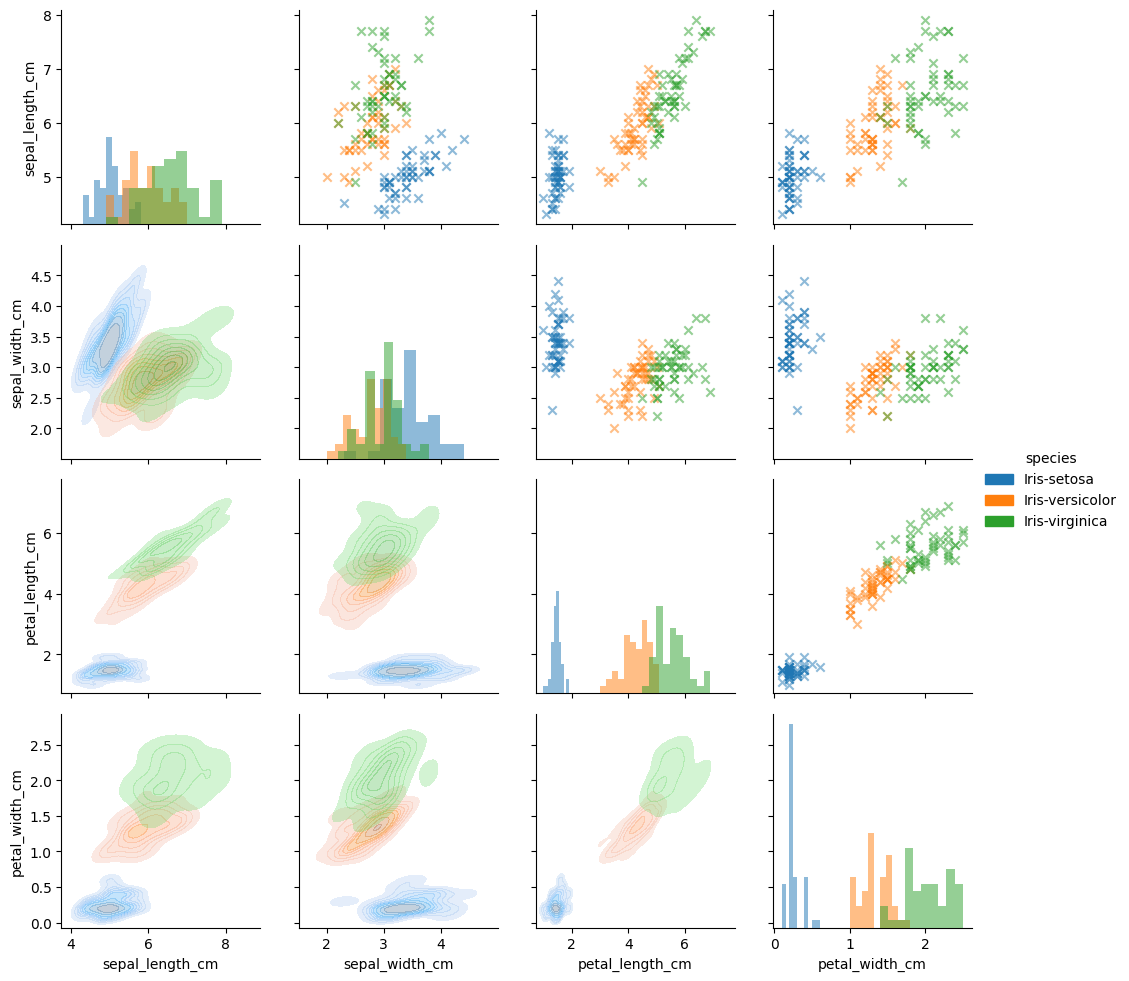

In [18]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker="x")
g.map_lower(sns.kdeplot, fill=True, thresh=0.05, alpha=0.3)
g.add_legend()

/home/dave/data-engineering/nsw-doe-data-stack-in-a-box/.venv/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='species', ylabel='petal_width_cm'>

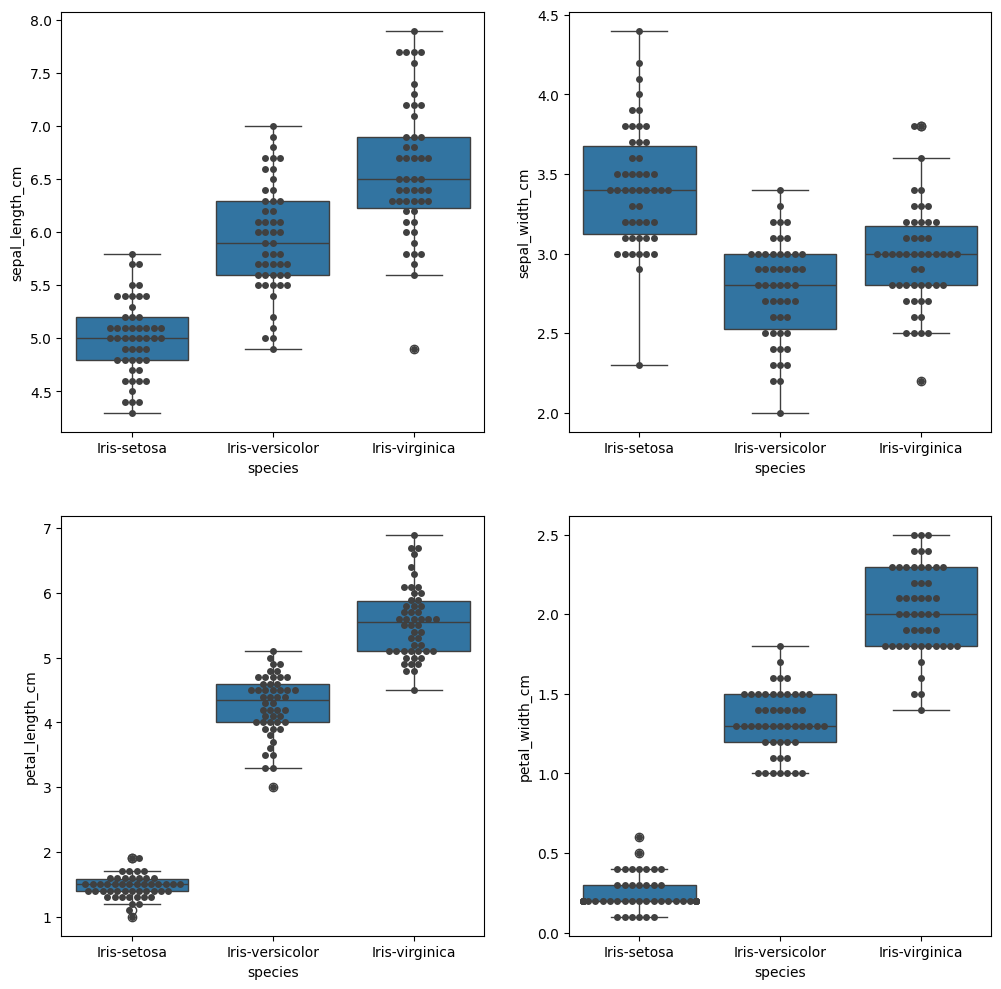

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.boxplot(x="species", y="sepal_length_cm", data=iris, ax=axs[0, 0])
sns.swarmplot(x="species", y="sepal_length_cm", data=iris, color=".25", ax=axs[0, 0])

sns.boxplot(x="species", y="sepal_width_cm", data=iris, ax=axs[0, 1])
sns.swarmplot(x="species", y="sepal_width_cm", data=iris, color=".25", ax=axs[0, 1])

sns.boxplot(x="species", y="petal_length_cm", data=iris, ax=axs[1, 0])
sns.swarmplot(x="species", y="petal_length_cm", data=iris, color=".25", ax=axs[1, 0])

sns.boxplot(x="species", y="petal_width_cm", data=iris, ax=axs[1, 1])
sns.swarmplot(x="species", y="petal_width_cm", data=iris, color=".25", ax=axs[1, 1])

In [20]:
# K-Means analysis

In [21]:
print(context.op_config)

3


In [22]:
import sklearn.cluster

estimator = sklearn.cluster.KMeans(n_clusters=context.op_config)
estimator.fit(
    iris[["sepal_length_cm", "sepal_width_cm", "petal_length_cm", "petal_width_cm"]]
)

KMeans(n_clusters=3)

In [23]:
iris["K-means cluster assignment"] = estimator.labels_

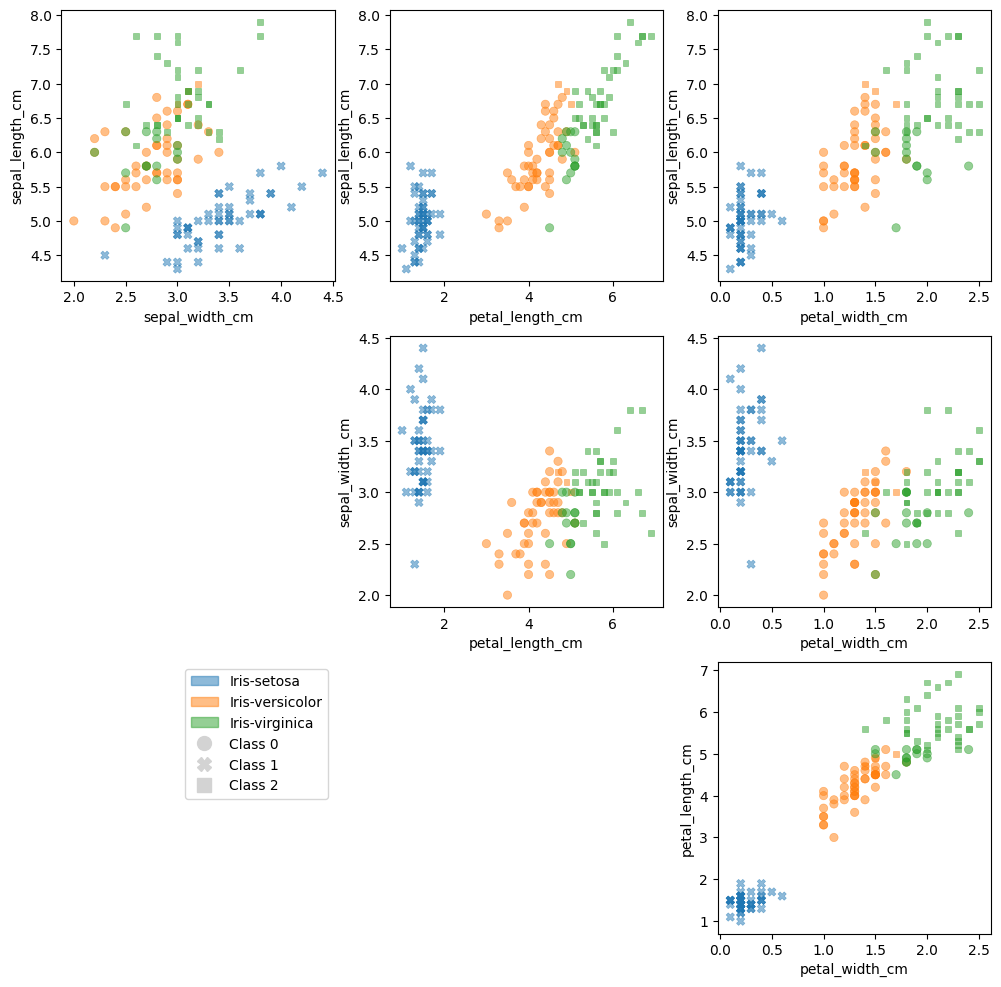

In [24]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

sns.scatterplot(
    x="sepal_width_cm",
    y="sepal_length_cm",
    data=iris,
    ax=axs[0, 0],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)
sns.scatterplot(
    x="petal_length_cm",
    y="sepal_length_cm",
    data=iris,
    ax=axs[0, 1],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)
sns.scatterplot(
    x="petal_width_cm",
    y="sepal_length_cm",
    data=iris,
    ax=axs[0, 2],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)

sns.scatterplot(
    x="petal_length_cm",
    y="sepal_width_cm",
    data=iris,
    ax=axs[1, 1],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)
sns.scatterplot(
    x="petal_width_cm",
    y="sepal_width_cm",
    data=iris,
    ax=axs[1, 2],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)

p = sns.scatterplot(
    x="petal_width_cm",
    y="petal_length_cm",
    data=iris,
    ax=axs[2, 2],
    hue="species",
    style="K-means cluster assignment",
    legend=False,
    marker="x",
    alpha=0.5,
)

axs[1, 0].axis("off")
axs[2, 0].axis("off")
axs[2, 1].axis("off")

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

palette = sns.color_palette()
setosa = mpatches.Patch(color=palette[0], label="Iris-setosa", alpha=0.5)
versicolor = mpatches.Patch(color=palette[1], label="Iris-versicolor", alpha=0.5)
virginica = mpatches.Patch(color=palette[2], label="Iris-virginica", alpha=0.5)

class_0 = mlines.Line2D(
    [], [], marker="o", color="lightgrey", linestyle="None", markersize=10, label="Class 0"
)
class_1 = mlines.Line2D(
    [], [], marker="X", color="lightgrey", linestyle="None", markersize=10, label="Class 1"
)
class_2 = mlines.Line2D(
    [], [], marker="s", color="lightgrey", linestyle="None", markersize=10, label="Class 2"
)

axs[2, 0].legend(handles=[setosa, versicolor, virginica, class_0, class_1, class_2])